## Observations and Insights 

In [326]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import linregress
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [249]:
# Checking the number of mice.
mice_total = len(mouse_study_data["Mouse ID"].unique())
mice_total

249

In [250]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate_df = mouse_study_data[["Mouse ID", "Timepoint"]]
mice_duplicate = mice_duplicate_df[mice_duplicate_df.duplicated(["Mouse ID", "Timepoint"])]
mice_duplicate

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [251]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate = mouse_study_data.loc[(
    mouse_study_data["Mouse ID"] == "g989")]
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [252]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_results = pd.DataFrame (mouse_study_data[mouse_study_data["Mouse ID"]!="g989"])
mice_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [253]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(mice_results["Mouse ID"].unique())
mice_number

248

## Summary Statistics

In [254]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
st_drug_regimen = mice_results[["Drug Regimen","Tumor Volume (mm3)"]]
dr_reg = st_drug_regimen.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_dr_reg = dr_reg.mean()
mean_dr_reg.rename(columns={'Tumor Volume (mm3)': 'Media'},inplace=True)

median_dr_reg = dr_reg.median()
median_dr_reg.rename(columns={'Tumor Volume (mm3)': 'Median'},inplace=True)

variance_dr_reg = dr_reg.var()
variance_dr_reg.rename(columns={'Tumor Volume (mm3)': 'Variance'},inplace=True)

st_dev_dr_reg = dr_reg.std() 
st_dev_dr_reg.rename(columns={'Tumor Volume (mm3)': 'Standard deviation'},inplace=True)

sem_dr_reg = dr_reg.sem()
sem_dr_reg.rename(columns={'Tumor Volume (mm3)': 'SEM'},inplace=True)

# Assemble the resulting series into a single summary dataframe.
summary_statistical = pd.concat([mean_dr_reg,median_dr_reg,variance_dr_reg,
                                 st_dev_dr_reg,sem_dr_reg], axis=1)

summary_statistical


,Media,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [255]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stf = st_drug_regimen.groupby(["Drug Regimen"]).agg(["mean",
                                                             "median","var","std","sem"])
summary_stf

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

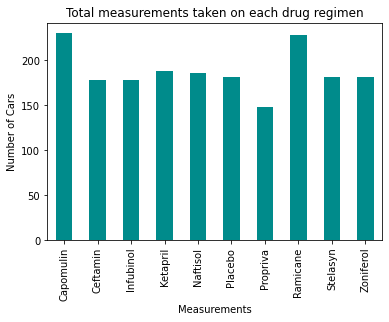

<Figure size 432x288 with 0 Axes>

In [256]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Group by Drug Regimen
drug_reg_pandas = mice_results.groupby(["Drug Regimen"])
# Get data
drug_reg = drug_reg_pandas["Drug Regimen"].count()
# Configure plot and ticks
count_chart = drug_reg.plot(kind="bar", facecolor="darkcyan"
                            ,title="Total measurements taken on each drug regimen")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Measurements")
count_chart.set_ylabel("Number of Cars")

# Show plot
plt.show()
plt.tight_layout()

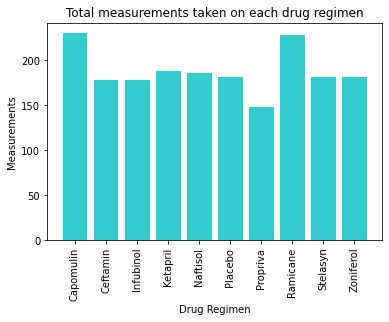

In [257]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_reg))

#We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, drug_reg, color='c', alpha=0.8, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
plt.xticks(tick_locations, drug_reg.index, rotation="vertical")

# Set textual properties
plt.title("Total measurements taken on each drug regimen")
plt.ylabel("Measurements")
plt.xlabel("Drug Regimen")

tick_locations = [value for value in x_axis]

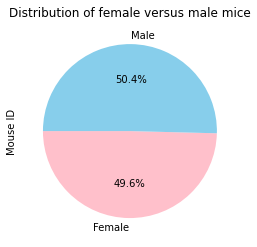

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Split up our data into groups based upon 'gender'
gender_group = pd.DataFrame(mice_results.drop_duplicates(subset="Mouse ID").groupby(["Sex"]).count())

# Create a new variable that holds the count of our groups
gender_count = gender_group ["Mouse ID"]

# Create a pie chart based upon the trip duration of that single bike
mouse_pie = gender_group.plot(kind="pie", y="Mouse ID", title="Distribution of female versus male mice",
                              colors =["pink","skyblue"], startangle=180,autopct="%1.1f%%",legend = False)
mouse_pie.set_ylabel("Mouse ID")
plt.show()


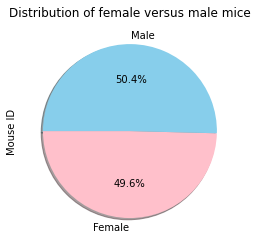

In [259]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender =list(gender_group.index.values)
gen_count = gender_group["Mouse ID"]
colors =["pink","skyblue"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gen_count, labels=mouse_gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180) 

# Set textual properties
plt.ylabel("Mouse ID")
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [300]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_reg = mice_results[(mice_results["Drug Regimen"]=="Capomulin") | (mice_results["Drug Regimen"]=="Ramicane") | 
                            (mice_results["Drug Regimen"]=="Infubinol") | (mice_results["Drug Regimen"]=="Ceftamin")]

# Start by getting the last (greatest) timepoint for each mouse

time_point = pd.DataFrame(four_reg.groupby(["Mouse ID"]).max()["Timepoint"])

time_point

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

last_tumor_volume= pd.merge(time_point,four_reg,how="inner", on=["Mouse ID","Timepoint"]).agg()
last_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [359]:

# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

treatment_count = 0

# Create empty list to fill with tumor vol data (for plotting)

tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    quartiles = last_tumor_volume["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    if treatment_count == 0:
        print(f"")
    print(f"For {treatment}:")
    print(f"the lower quartile is: {lowerq}")
    print(f"the upper quartile is: {upperq}")
    print(f"the interquartile range is: {iqr}")
    print(f"the the median is: {quartiles} ")
    print(f"")
    treatment_count += 1
    next
 


For Capomulin:
the lower quartile is: 37.187743802499995
the upper quartile is: 59.930261755000004
the interquartile range is: 22.74251795250001
the the median is: 0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64 

For Ramicane:
the lower quartile is: 37.187743802499995
the upper quartile is: 59.930261755000004
the interquartile range is: 22.74251795250001
the the median is: 0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64 

For Infubinol:
the lower quartile is: 37.187743802499995
the upper quartile is: 59.930261755000004
the interquartile range is: 22.74251795250001
the the median is: 0.25    37.187744
0.50    45.000000
0.75    59.930262
Name: Tumor Volume (mm3), dtype: float64 

For Ceftamin:
the lower quartile is: 37.187743802499995
the upper quartile is: 59.930261755000004
the interquartile range is: 22.74251795250001
the the median is: 0.25    37.187744
0.50    45.000000
0.75    59.930262


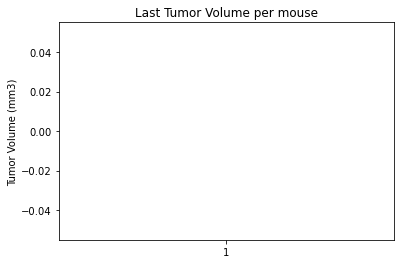

In [355]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Last Tumor Volume per mouse')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_list)
plt.show()

## Line and Scatter Plots

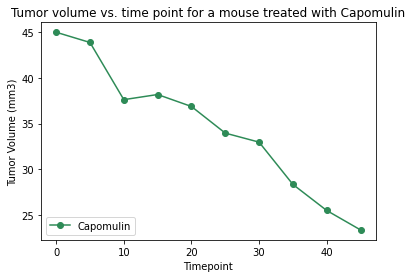

In [301]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = mice_results.loc[(
    mice_results["Drug Regimen"] == "Capomulin") & (mice_results["Mouse ID"]=="s185")]
mouse_capomulin

tumor_volume_cap = mouse_capomulin["Tumor Volume (mm3)"].to_list()
time_point_cap = mouse_capomulin["Timepoint"].to_list()

# Set x axis and variables
x_axis_data = time_point_cap
x_axis_data

plt.plot(x_axis_data, tumor_volume_cap,marker='o', color='seagreen', label="Capomulin")
# Adds a legend and sets its location to the lower right
plt.legend(loc="lower left")
plt.title("Tumor volume vs. time point for a mouse treated with Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.show()


Text(0, 0.5, 'Tumor Volume (mm3)')

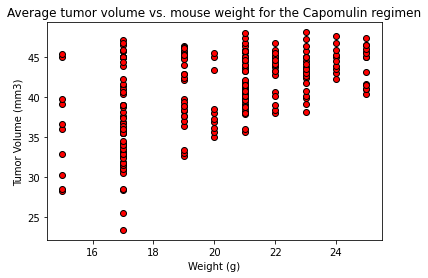

In [311]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice_capomulin = mice_results.loc[(
    mice_results["Drug Regimen"] == "Capomulin")]
mice_capomulin

tumor_volume_cp = mice_capomulin["Tumor Volume (mm3)"].to_list()
weight_g = mice_capomulin["Weight (g)"].to_list()
# The size of each point on our plot is determined by their x value
plt.scatter(weight_g,tumor_volume_cp, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")



## Correlation and Regression

In [327]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mice_capomulin["Weight (g)"],mice_capomulin["Tumor Volume (mm3)"])
print(f"The correlation coefficient between Tumor Volume and Weight is {round(correlation[0],2)}")

The correlation coefficient between Tumor Volume and Weight is 0.53


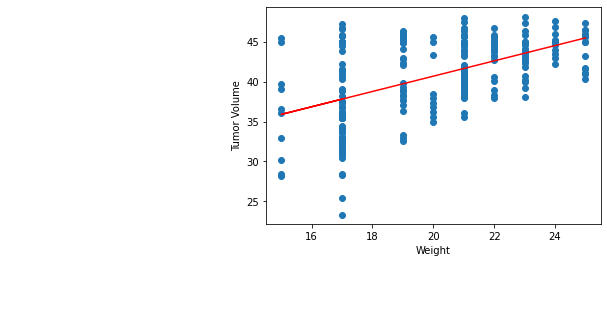

In [328]:
x_values = mice_capomulin["Weight (g)"]
y_values = mice_capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()